In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_dt =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (latest_dt)

('2017-08-23',)


In [12]:
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print( year_ago)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores

m_prcp = session.query(Measurement.prcp , Measurement.date).filter(Measurement.date > '2016-08-23').\
order_by(Measurement.date).all()

#m_prcp


In [14]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# it converts the date column into a date and time index

df = pd.DataFrame(m_prcp, columns = ['prcp', 'date'])
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace =True)

# Sort the dataframe by date
df.sort_values('date')









,prcp
date,
2016-08-24,2.0
2016-08-24,54.6
2016-08-24,57.9
2016-08-24,NaN
2016-08-24,31.0
...,...
2017-08-22,12.7
2017-08-23,2.0
2017-08-23,0.0


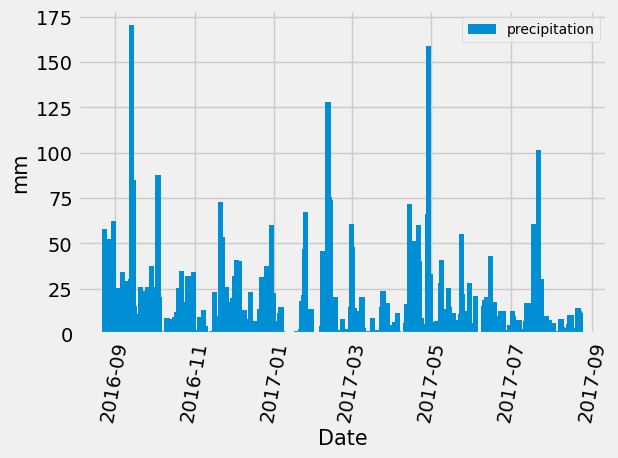

In [15]:

# Use Pandas Plotting with Matplotlib to plot the data


plt.bar(df.index,df['prcp'],width=4)
plt.xticks(rotation=80)
plt.xlabel('Date',fontsize =15)
plt.ylabel('mm', fontsize =15)
plt.tight_layout()
plt.legend(['precipitation'],fontsize =10)

plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset

station= session.query(func.count(Station.station)).scalar()
station                                                                               

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations= session.query(Station.station,Station.name,func.count(Station.station)).\
    filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()).all()
active_stations                                                                                   

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. (WAIHEE 837.5, HI US', 2772)
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

print([(lowest_temp,highest_temp,avg_temp )])

[(12.2, 29.4, 22.03582251082316)]


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.date>='2016-08-23').\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').all()


#convert the query into a list
observation = [t[0] for t in temp_obs]
#observation



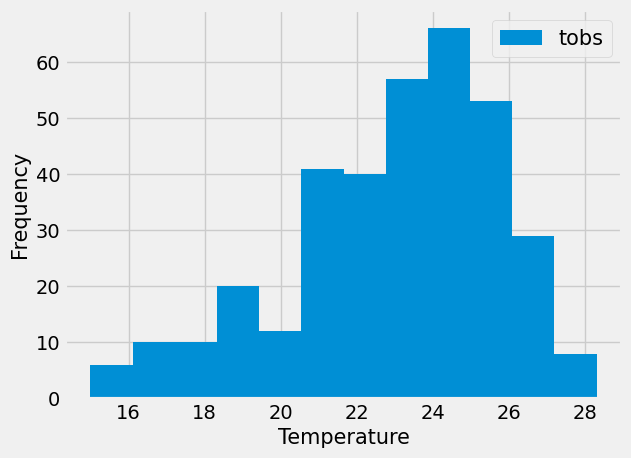

In [21]:

#plot histogram of the result

plt.hist(observation, bins =12, label = 'tobs')
plt.xlabel('Temperature',fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


# Close Session

In [22]:
# Close Session
session.close()